<a href="https://colab.research.google.com/github/debjyotistat07/Breast-Cancer-Prediction-Using-Classificarion/blob/main/Breast_Cancer_Prediction_using_Classificationediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Breast Cancer Prediction using Logistic Regression

This project uses the **Breast Cancer Wisconsin Dataset** to build a machine learning model  
that predicts whether a tumor is **benign (0)** or **malignant (1)**.


In [9]:
import pandas as pd
df=pd.read_csv("/content/breast-cancer.csv")
print(df.head(10))

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   
7  84458202         M        13.71         20.83           90.20      577.9   
8    844981         M        13.00         21.82           87.50      519.8   
9  84501001         M        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010 

In [3]:
df.isnull().values.any()
df.isnull().sum()
df.isnull().mean() * 100



,0
id,0.0
diagnosis,0.0
radius_mean,0.0
texture_mean,0.0
perimeter_mean,0.0
area_mean,0.0
smoothness_mean,0.0
compactness_mean,0.0
concavity_mean,0.0
concave points_mean,0.0


####There is no missing values in the dataset

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


#  Data preprocessing

In [10]:
df_clean = df.drop("id", axis=1)
df_clean["diagnosis"] = df_clean["diagnosis"].map({"M": 1, "B": 0})
X = df_clean.drop("diagnosis", axis=1)
y = df_clean["diagnosis"]
print("Features shape:", X.shape)
print("Target distribution:\n", y.value_counts())

Features shape: (569, 30)
Target distribution:
 diagnosis
0    357
1    212
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

Before building our classification model, we need to explore the dataset.  
EDA helps us understand data distributions, relationships, and potential issues  
such as imbalance or multicollinearity.


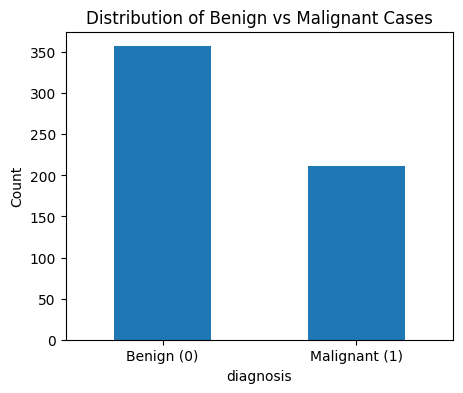

In [13]:
# Class Distribution (Benign vs Malignant)
plt.figure(figsize=(5,4))
y.value_counts().plot(kind="bar")
plt.xticks([0,1], ["Benign (0)", "Malignant (1)"], rotation=0)
plt.ylabel("Count")
plt.title("Distribution of Benign vs Malignant Cases")
plt.show()


✅ The dataset is relatively balanced, with slightly more benign cases.  
This is good because it avoids strong bias toward one class.


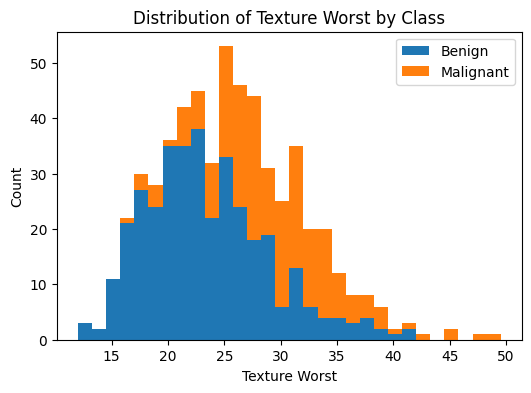

In [14]:
# Histogram for texture_worst
plt.figure(figsize=(6,4))
plt.hist([X['texture_worst'][y==0], X['texture_worst'][y==1]],
         bins=30, stacked=True, label=["Benign","Malignant"])
plt.xlabel("Texture Worst")
plt.ylabel("Count")
plt.title("Distribution of Texture Worst by Class")
plt.legend()
plt.show()


✅ Malignant tumors tend to have higher `texture_worst` values,  
while benign tumors cluster at lower values.


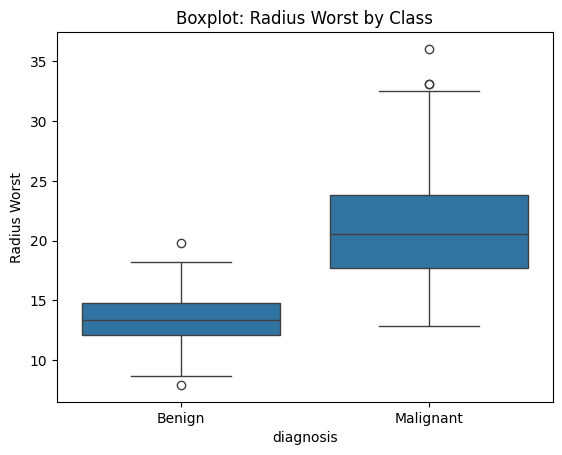

In [15]:
# Boxplot for radius_worst
sns.boxplot(x=y, y=X['radius_worst'])
plt.xticks([0,1], ["Benign","Malignant"])
plt.ylabel("Radius Worst")
plt.title("Boxplot: Radius Worst by Class")
plt.show()


✅ Malignant tumors usually have larger `radius_worst` values.  
The separation is quite visible between the two classes.


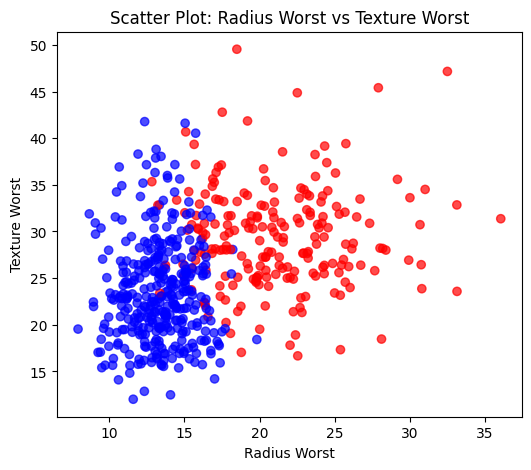

In [16]:
# Scatter: Radius Worst vs Texture Worst
plt.figure(figsize=(6,5))
plt.scatter(X['radius_worst'], X['texture_worst'], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("Radius Worst")
plt.ylabel("Texture Worst")
plt.title("Scatter Plot: Radius Worst vs Texture Worst")
plt.show()


✅ There is a clear separation:  
- Benign tumors cluster in the **lower-left** (small radius, low texture).  
- Malignant tumors shift toward the **upper-right** (large radius, high texture).


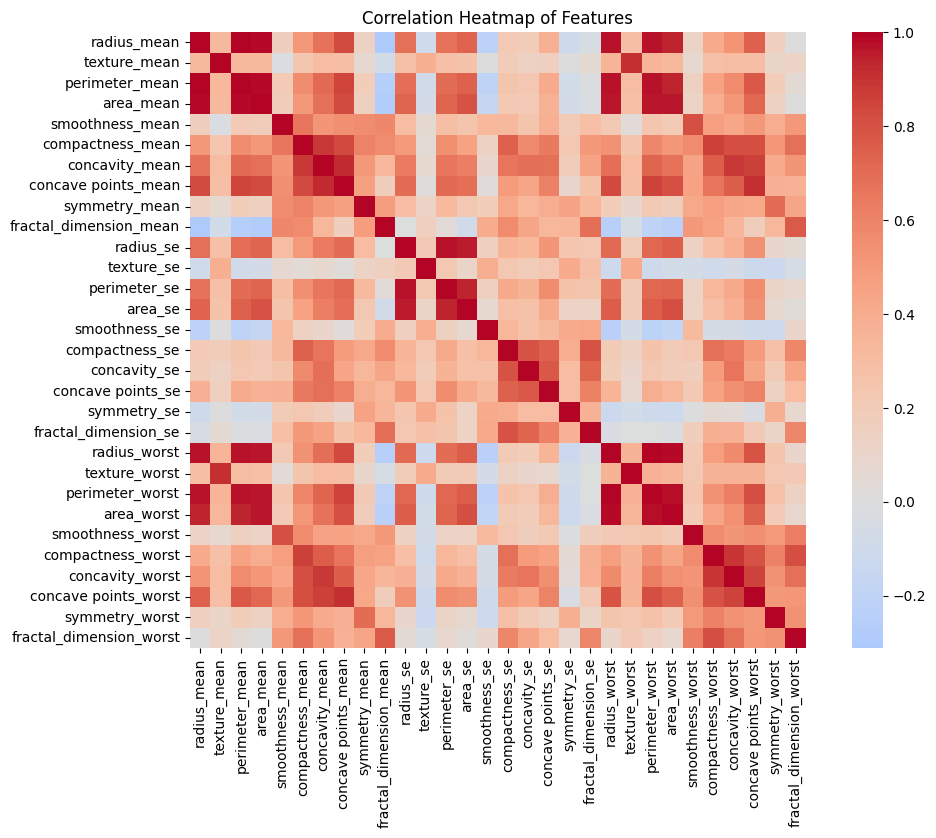

In [17]:
# Correlation Heatmap
corr = X.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, cbar=True, square=True)
plt.title("Correlation Heatmap of Features")
plt.show()


✅ Strong correlations exist between features such as `radius`, `area`, and `perimeter`.  
This means some features are redundant. Logistic Regression can still handle it,  
but feature selection may improve efficiency.


#Train-Test Split & Scaling

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training data shape:", X_train_scaled.shape)
print("Testing data shape:", X_test_scaled.shape)

Training data shape: (455, 30)
Testing data shape: (114, 30)


#Model Training

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [32]:
y_pred = log_reg.predict(X_test_scaled)
y_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
print("Model trained successfully!")

Model trained successfully!


#Model Evaluation

In [33]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

# Print results
print("Logistic Regression Model Performance:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")
print(f"ROC-AUC   : {roc_auc:.4f}")


Logistic Regression Model Performance:
Accuracy  : 0.9737
Precision : 0.9756
Recall    : 0.9524
F1 Score  : 0.9639
ROC-AUC   : 0.9954


Accuracy → Overall correctness of predictions.

Precision → Out of predicted malignant, how many are actually malignant.

Recall (Sensitivity) → Out of actual malignant, how many we caught.

F1 Score → Balance between precision & recall.

ROC-AUC → How well model separates malignant vs benign.

In [25]:
# Training accuracy
train_acc = accuracy_score(y_train, log_reg.predict(X_train_scaled))

# Testing accuracy
test_acc = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_acc)
print("Testing Accuracy :", test_acc)


Training Accuracy: 0.9868131868131869
Testing Accuracy : 0.9736842105263158


#Confusion Matrix

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [27]:
cm = confusion_matrix(y_test, y_pred)

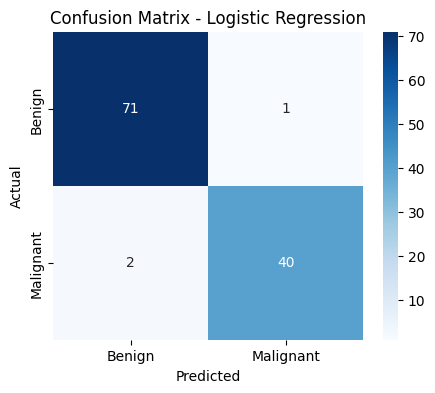

In [28]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Benign", "Malignant"],
            yticklabels=["Benign", "Malignant"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

A confusion matrix provides a more detailed breakdown about model's predictions. . It shows :

True Positives (TP): The number of cases correctly predicted as Malignant.

True Negatives (TN): The number of cases correctly predicted as Benign.

False Positives (FP): The number of cases incorrectly predicted as Malignant (a healthy person gets a bad diagnosis).

False Negatives (FN): The number of cases incorrectly predicted as Benign (a sick person gets a good diagnosis).

In a medical context like breast cancer detection, minimizing False Negatives is often the most important goal, as missing a malignant tumor can have severe consequences.

#ROC Curve (Receiver Operating Characteristic)

In [ ]:
from sklearn.metrics import roc_curve, auc


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

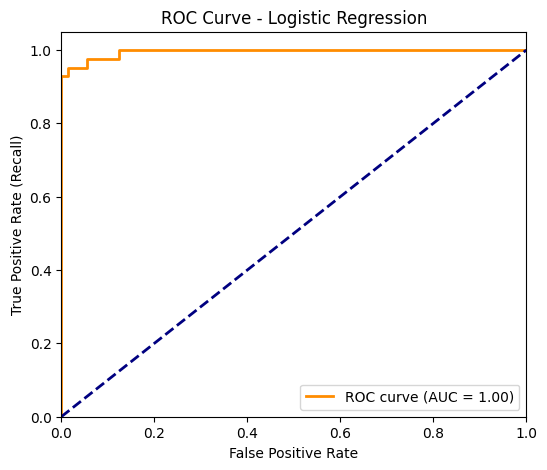

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color="darkorange", lw=2,
         label="ROC curve (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")  # baseline
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.show()

X-axis → False Positive Rate (how many healthy wrongly classified as malignant).

Y-axis → True Positive Rate (how many malignant correctly identified).

AUC (Area Under Curve) → Closer to 1.0 means excellent classification.

#Precision Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
prec, rec, thresholds = precision_recall_curve(y_test, y_proba)


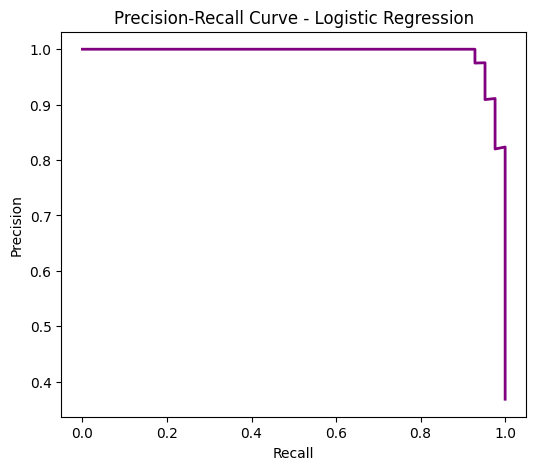

In [ ]:
plt.figure(figsize=(6,5))
plt.plot(rec, prec, color="purple", lw=2)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve - Logistic Regression")
plt.show()

Precision → Out of predicted malignant cases, how many were correct.

Recall → Out of actual malignant cases, how many we detected.

In cancer diagnosis, high recall is critical (we don’t want to miss malignant cases).

This curve helps balance false alarms (low precision) vs missed cancers (low recall).

#Feature Importance

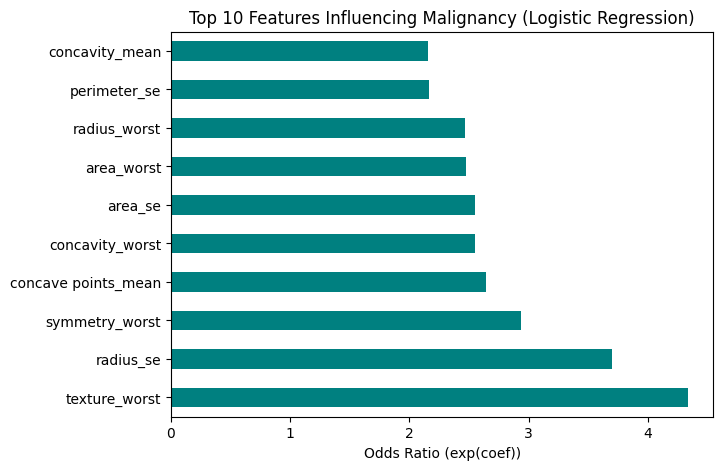

In [ ]:
import numpy as np


odds_ratios = pd.Series(np.exp(log_reg.coef_[0]), index=X.columns)

top_features = odds_ratios.sort_values(ascending=False).head(10)
plt.figure(figsize=(7,5))
top_features.plot(kind="barh", color="teal")
plt.xlabel("Odds Ratio (exp(coef))")
plt.title("Top 10 Features Influencing Malignancy (Logistic Regression)")
plt.show()


The x-axis shows the odds ratio (exp(coef)).

Odds Ratio > 1 → increases the likelihood of being malignant.

The further to the right, the stronger the effect.

These features are sorted by importance (top = less strong, bottom = most strong).

# Conclusion

- Logistic Regression achieved **high accuracy and AUC**, showing strong performance.  
- Features such as `texture_worst`, `radius_worst`, and `concavity_mean` strongly influence predictions.  
- Visualizations (ROC, PR curve, confusion matrix) confirm the model's effectiveness.  



#Building a predictive system

In [34]:
import numpy as np

# Example input data for a new patient (values must match the order of X.columns)
new_patient = np.array([
    17.99, 10.38, 122.8, 1001.0, 0.11840, 0.27760, 0.30010, 0.14710, 0.2419, 0.07871,
    1.0950, 0.9050, 8.5890, 153.40, 0.00639, 0.04904, 0.05373, 0.01587, 0.03003, 0.00619,
    25.38, 17.33, 184.60, 2019.0, 0.16220, 0.66560, 0.71190, 0.26540, 0.4601, 0.11890
])  # Example from the sklearn dataset

# Scale the data (important!)
new_patient_scaled = scaler.transform([new_patient])

# Predict
prediction = log_reg.predict(new_patient_scaled)[0]
result = "Malignant" if prediction == 1 else "Benign"

print("Prediction for new patient:", result)


Prediction for new patient: Malignant


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
